# Business Porblem : 

### Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute which has recently suffered considerable dips in its revenues. Yulu need help in understanding which variables affects its customers, demand and increase of market share in India

Importing data and applying basic EDA on it.

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [297]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [298]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [299]:
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [300]:
df.shape

(10886, 12)

In [301]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [302]:
df['season'].replace([1,2,3,4],["spring","summer","fall","winter"],inplace=True)
df['holiday'].replace([0,1],['Yes','No'], inplace=True)
df['workingday'].replace([0,1],['Working Day','Non working day'], inplace=True)
df['weather'].replace([1,2,3,4],['Good','cloudy/mist','slightly bad','Bad'],inplace=True)

In [303]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [304]:
df.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [305]:
columns = ['season', 'holiday', 'workingday', 'weather',
        'humidity', 'casual', 'registered', 'count']
for col in columns:
    print(f"Feature {col}")
    print(df[col].value_counts()[:10])
    print("-"*50)

Feature season
winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64
--------------------------------------------------
Feature holiday
Yes    10575
No       311
Name: holiday, dtype: int64
--------------------------------------------------
Feature workingday
Non working day    7412
Working Day        3474
Name: workingday, dtype: int64
--------------------------------------------------
Feature weather
Good            7192
cloudy/mist     2834
slightly bad     859
Bad                1
Name: weather, dtype: int64
--------------------------------------------------
Feature humidity
88    368
94    324
83    316
87    289
70    259
65    253
46    247
66    246
77    244
49    234
Name: humidity, dtype: int64
--------------------------------------------------
Feature casual
0    986
1    667
2    487
3    438
4    354
5    332
6    269
8    250
7    250
9    230
Name: casual, dtype: int64
--------------------------------------------------
Feature registered

In [306]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,Yes,Working Day,Good,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,Yes,Working Day,Good,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,Yes,Working Day,Good,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,Yes,Working Day,Good,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,Yes,Working Day,Good,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,Yes,Non working day,Good,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,Yes,Non working day,Good,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,Yes,Non working day,Good,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,Yes,Non working day,Good,13.94,17.425,61,6.0032,12,117,129


In [307]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Insights on basic EDA
* There are 12 features present in the data.
* All the conversion of datetime, categorical and numbercial data is done above.
* No missing and null values were found.
* The mean of customers is found to be 191 per hour where 36 customers are casual and 156 are registered.
* The median of customers per hour is found to be 145 with 42 customers in first quartile and 284 customers in third quartile.
* The maximum customers were found to be 977.

### Treating outliers

* Down below you will see data is normally distributed and hence we see so many outliers but they will be minimized after transformation so we really dont have to remove them.

## Graphical Analysis

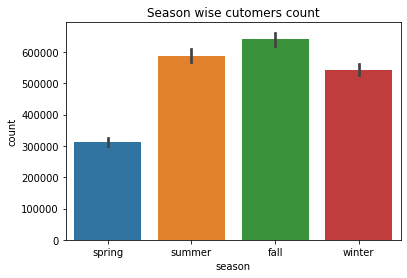

In [179]:
sns.barplot(x='season',y='count',data=df,estimator=np.sum)
plt.title('Season wise cutomers count')
plt.show()

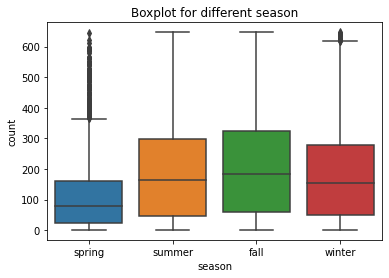

In [310]:
sns.boxplot(x='season',y='count',data=k)
plt.title('Boxplot for different season')
plt.show()

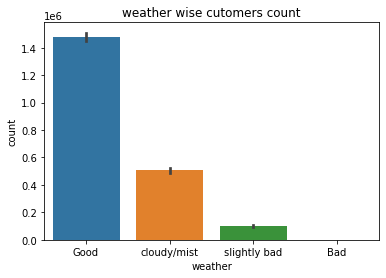

In [180]:
sns.barplot(x='weather',y='count',data=df,estimator = np.sum)
plt.title('weather wise cutomers count')
plt.show()

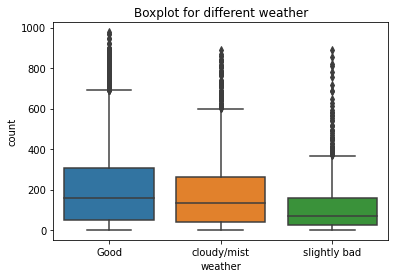

In [234]:
# Note that bad weather row is dropped.
sns.boxplot(x='weather',y='count',data=df)
plt.title('Boxplot for different weather')
plt.show()

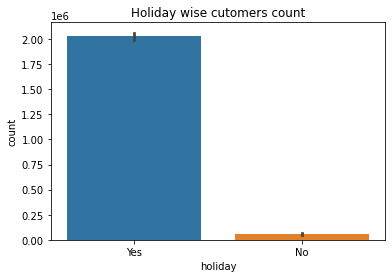

In [181]:
sns.barplot(x='holiday',y='count',data=df,estimator=np.sum)
plt.title('Holiday wise cutomers count')
plt.show()

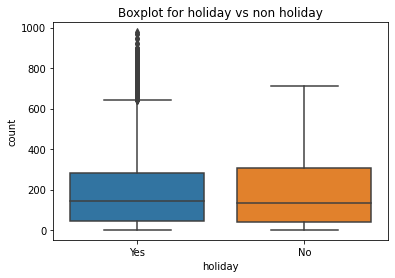

In [241]:
sns.boxplot(x='holiday',y='count',data=df)
plt.title('Boxplot for holiday vs non holiday')
plt.show()

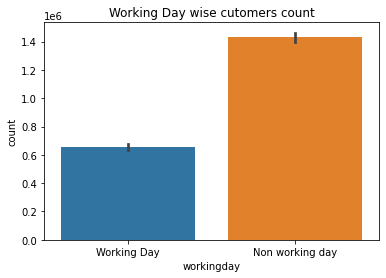

In [182]:
sns.barplot(x='workingday',y='count',data=df,estimator=np.sum)
plt.title('Working Day wise cutomers count')
plt.show()

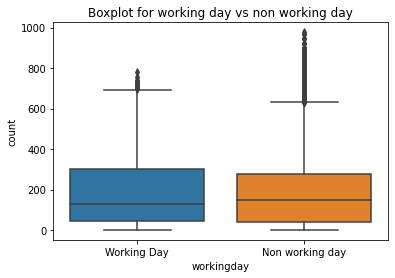

In [239]:
sns.boxplot(x='workingday',y='count',data=df)
plt.title('Boxplot for working day vs non working day')
plt.show()

In [183]:
print(f"Number of casual users are : {df['casual'].sum()}, where as number of registered users are : {df['registered'].sum()}.")

Number of casual users are : 392135, where as number of registered users are : 1693341.


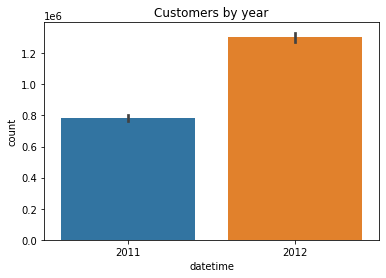

In [184]:
sns.barplot(x=df['datetime'].dt.year,y='count',data=df,estimator=np.sum)
plt.title("Customers by year")
plt.show()

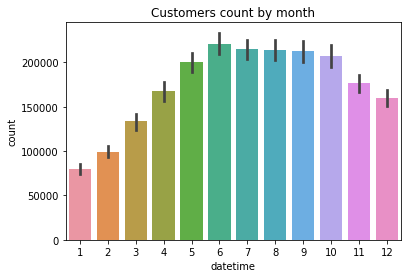

In [185]:
sns.barplot(x=df['datetime'].dt.month,y='count',data=df,estimator=np.sum)
plt.title("Customers count by month")
plt.show()

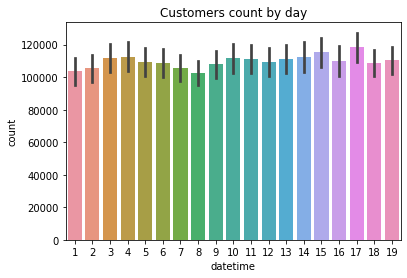

In [186]:
sns.barplot(x=df['datetime'].dt.day,y='count',data=df,estimator=np.sum)
plt.title("Customers count by day")
plt.show()

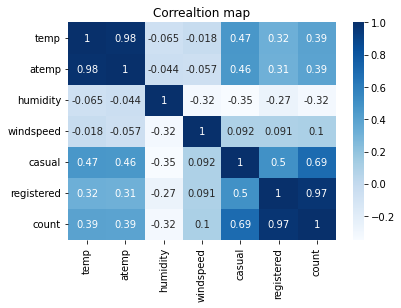

In [187]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('Correaltion map')
plt.show()

### Insights:
* Most customers are found in fall season followed by summer winter and spring respectively.
* One import point to noted is majority of customers are useing Yulu's bikes when the weather is Good.
* Almost no-one uses Yulu bikes when the weather is bad.
* Holidays are the most successfull day for Yulu bikes.
* Almost twice the prople use Yulu bikes in non working day
* Customer count has incresed in year 2012
* We see an increasing trend till the month of June and then it slihtly decrease.
* Customers are evenly spread across all days.
* No proper relation is found among the features.

### Distributions:

Text(0.5, 1.0, 'Distribution of customer count per hour.')

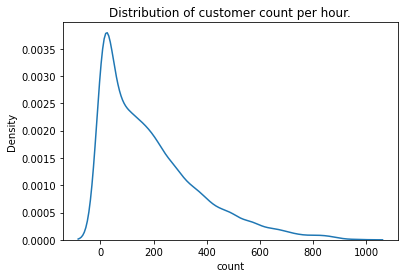

In [188]:
sns.kdeplot(df['count'])
plt.title('Distribution of customer count per hour.')

Text(0.5, 1.0, 'Distribution of temperature')

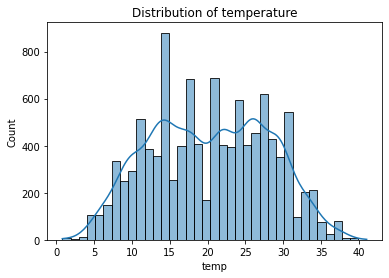

In [189]:
sns.histplot(df['temp'],kde=True)
plt.title('Distribution of temperature')

Text(0.5, 1.0, 'Distribution of humidity')

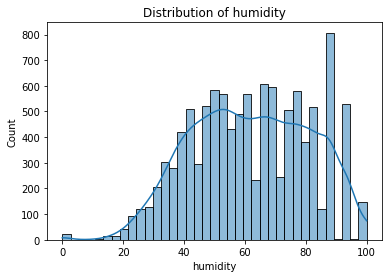

In [190]:
sns.histplot(df['humidity'],kde=True)
plt.title('Distribution of humidity')

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

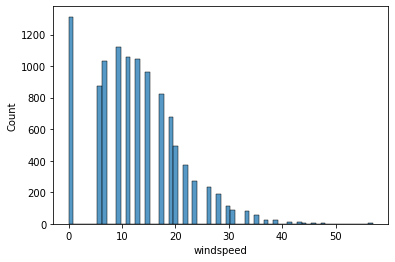

In [191]:
sns.histplot(df['windspeed'])

<AxesSubplot:xlabel='count', ylabel='Count'>

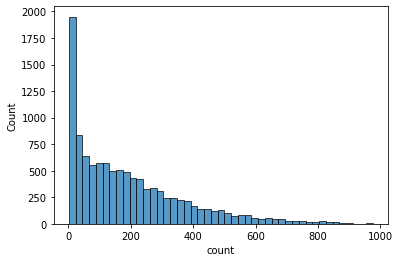

In [192]:
sns.histplot(df['count'])

<AxesSubplot:xlabel='casual', ylabel='Count'>

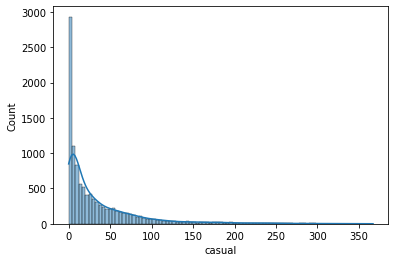

In [193]:
sns.histplot(df['casual'],kde=True)

<AxesSubplot:xlabel='registered', ylabel='Count'>

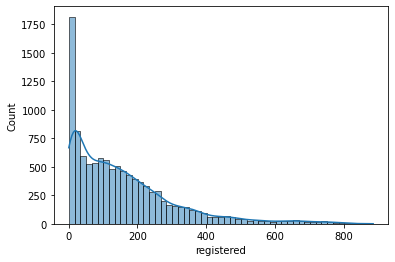

In [194]:
sns.histplot(df['registered'],kde=True)

### Insights: 
* None of the distribution follows normal distribition.
* Log distribution is found in most of the features.
* Appropriate transformation needs to performed on the above distributions.

## Hypothesis Testing:

### 2 Sample T-Test:
#### To check whether working day has an effect on number of cycles rented.
* The Null hypothesis 'H0' is mean of customers count is same in working day and non-working day.
* The alternative hypothesis 'H1' is mean of customers count is not the same in working day and non-working day.

In [195]:
print(df[df['workingday'] == 'Working Day']['count'].std(),df[df['workingday'] == 'Non working day']['count'].std())

173.7240153250003 184.5136590421481


In [196]:
t,p = stats.ttest_ind(df[df['workingday'] == 'Working Day']['count'],df[df['workingday'] == 'Non working day']['count'])
print(f"The test statistics is found to be {t.round(2)} with the p-value {p.round(2)}, considering alpha as {5}%, we fail to reject our null hypothesis and hence we conclude that working day does not has effect on number of cycles rented.")

The test statistics is found to be -1.21 with the p-value 0.23, considering alpha as 5%, we fail to reject our null hypothesis and hence we conclude that working day does not has effect on number of cycles rented.


### Insights:
* The test statistics is found to be -1.21 with the p-value 0.23, considering alpha as 5%, we fail to reject our null hypothesis and hence we conclude that working day "does not" has effect on number of cycles rented.


## Annova:
### To check number of cycles rented in different 1. Season and 2. Weather.
First we need to check for normality to perform Annova

In [197]:
good = df[df['weather'] == 'Good']['count']
bad = df[df['weather'] == 'Bad']['count']
slightly_bad = df[df['weather'] == 'slightly bad']['count']
cloudy = df[df['weather'] == 'cloudy/mist']['count']

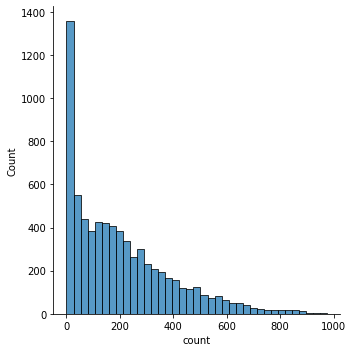

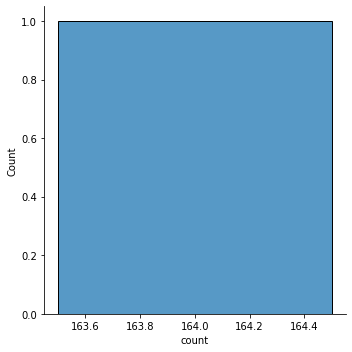

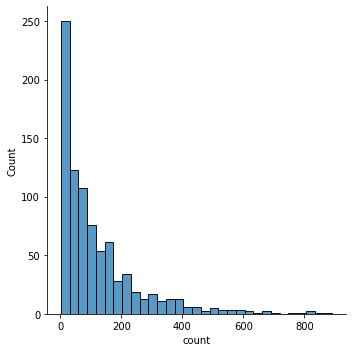

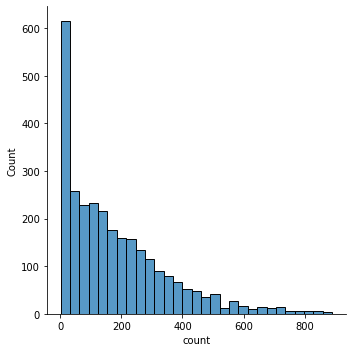

In [198]:
sns.displot(good)
plt.show()
sns.displot(bad)
plt.show()
sns.displot(slightly_bad)
plt.show()
sns.displot(cloudy)
plt.show()

### Checking which transformation work better for our case.

In [199]:
df_good_log = df[df['weather'] == 'Good']['count'].apply(lambda x: np.log(x))
# df_sbad_log = df[df['weather'] == 'slightly bad']['count'].apply(lambda x: np.log(x))
# df_cloudy_log = df[df['weather'] == 'cloudy/mist']['count'].apply(lambda x: np.log(x))
df_good_boxcox = stats.boxcox(df[df['weather'] == 'Good']['count'])

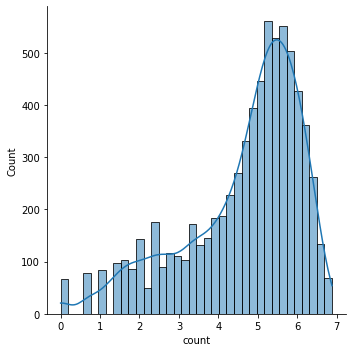

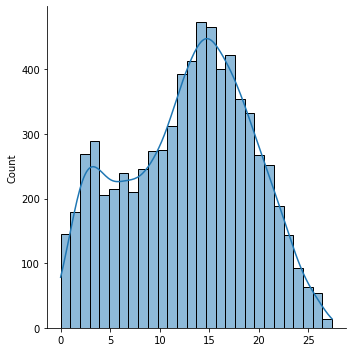

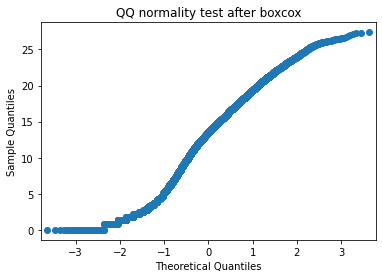

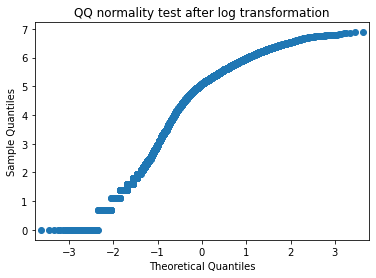

In [200]:
sns.displot(df_good_log,kde=True)
plt.show()
sns.displot(df_good_boxcox[0],kde=True)
plt.show()

qqplot(good_boxcox[0])
plt.title('QQ normality test after boxcox')
plt.show()
qqplot(df_good_log)
plt.title('QQ normality test after log transformation')
plt.show()


## Comment on transformation.
* It was found that the boxcox is better than log transformation and hence we use boxcox.
* Also there was only one scenario when the weather was bad and hence it was dropped.

In [201]:
good_boxcox = stats.boxcox(df[df['weather'] == 'Good']['count'])
sbad_boxcox = stats.boxcox(df[df['weather'] == 'slightly bad']['count'])
cloudy_boxcox = stats.boxcox(df[df['weather'] == 'cloudy/mist']['count'])

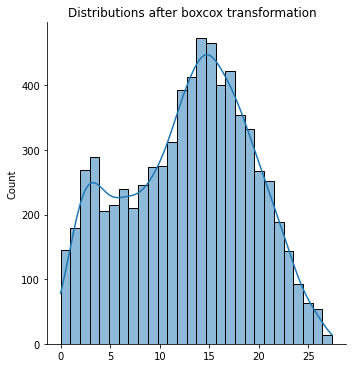

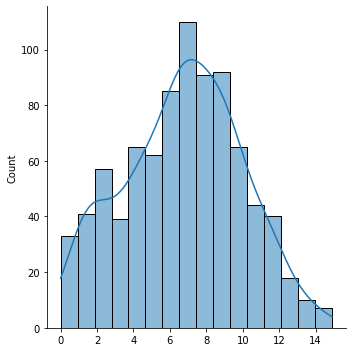

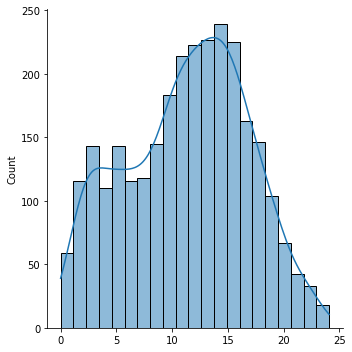

In [202]:
sns.displot(good_boxcox[0],kde=True)
plt.title('Distributions after boxcox transformation  ')
sns.displot(sbad_boxcox[0],kde=True)
sns.displot(cloudy_boxcox[0],kde=True)


#### Setting null and alternative hypothesis to check if means of different weather customer count is same or not.
* Null hypothesis 'H0' : Number of cycles rented in diffent weather is same.
* Alternative 'H1' : Number of cycles rented in diffent weather is different.

In [203]:
print(f"The variance for good weather for customer count is {good_boxcox[0].var().round(2)}")
print(f"The variance for slightly bad weather for customer count is {sbad_boxcox[0].var().round(2)}")
print(f"The variance for cloudy weather for customers count is {cloudy_boxcox[0].var().round(2)}")


The variance for good weather for customer count is 39.81
The variance for slightly bad weather for customer count is 10.47
The variance for cloudy weather for customers count is 30.02


## Comment on test assumptions.
* Ideally we should not apply Annova with such greater variation is variance but as this is a more practical case, we are anyway applying Annova

In [204]:
t,p = stats.f_oneway(good_boxcox[0],sbad_boxcox[0],cloudy_boxcox[0])

In [205]:
print(f"The test statistics is found to be {t.round(2)} with the p-value {p.round(2)}, considering alpha as {5}%, we reject our null hypothesis and hence we conclude that diffenent weather 'has' effect on number of cycles rented.")

The test statistics is found to be 431.8 with the p-value 0.0, considering alpha as 5%, we reject our null hypothesis and hence we conclude that diffenent weather 'has' effect on number of cycles rented.


#### Setting null and alternative hypothesis to check if means of different seasons customer count is same or not.
* Null hypothesis 'H0' : Number of cycles rented in diffent season is same.
* Alternative 'H1' : Number of cycles rented in diffent season is different.

In [206]:
spring = df[df['season'] == 'spring']['count']
summer = df[df['season'] == 'summer']['count']
fall = df[df['season'] == 'fall']['count']
winter = df[df['season'] == 'winter']['count']

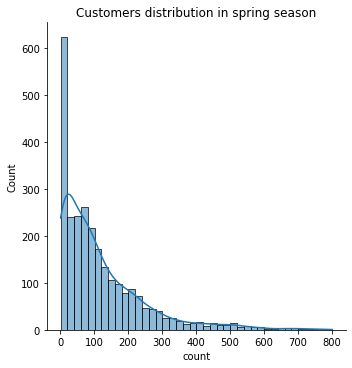

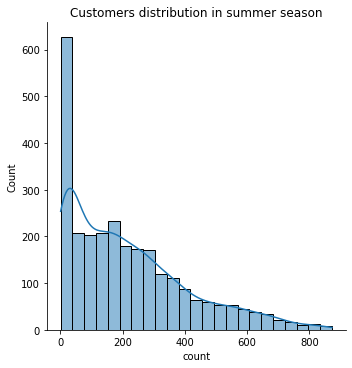

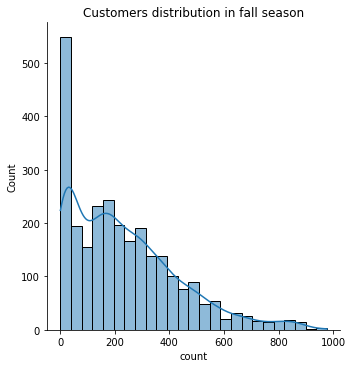

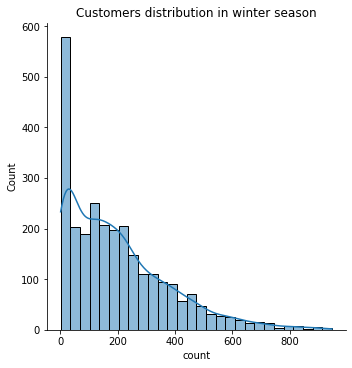

In [207]:
sns.displot(spring,kde=True)
plt.title('Customers distribution in spring season')
plt.show()

sns.displot(summer,kde=True)
plt.title('Customers distribution in summer season')
plt.show()

sns.displot(fall,kde=True)
plt.title('Customers distribution in fall season')
plt.show()

sns.displot(winter,kde=True)
plt.title('Customers distribution in winter season')
plt.show()

In [208]:
print(f"The variance for spring is {df[df['season'] == 'spring']['count'].var().round(2)}")
print(f"The variance for summber is {df[df['season'] == 'spring']['count'].var().round(2)}")
print(f"The variance for fall is {df[df['season'] == 'fall']['count'].var().round(2)}")
print(f"The variance for winter is {df[df['season'] == 'winter']['count'].var().round(2)}")

The variance for spring is 15693.57
The variance for summber is 15693.57
The variance for fall is 38868.52
The variance for winter is 31549.72


## Comment on test assumptions.
* Once again the ideal assumption is that variance is same and data is normal but none of them is found in our case and hence statistically we should not apply annova but in real world we need to dealt with this kind of data only.

In [209]:
# Applying boxcox transformation.
spring_boxcox = stats.boxcox(df[df['season'] == 'spring']['count'])
summer_boxcox = stats.boxcox(df[df['season'] == 'summer']['count'])
fall_boxcox = stats.boxcox(df[df['season'] == 'fall']['count'])
winter_boxcox = stats.boxcox(df[df['season'] == 'winter']['count'])

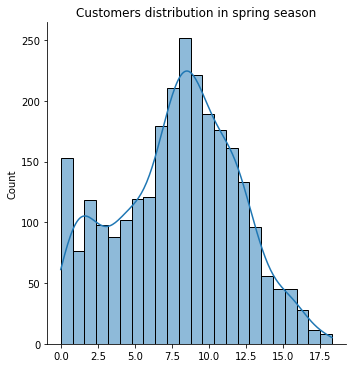

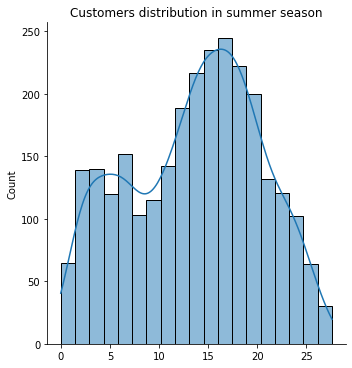

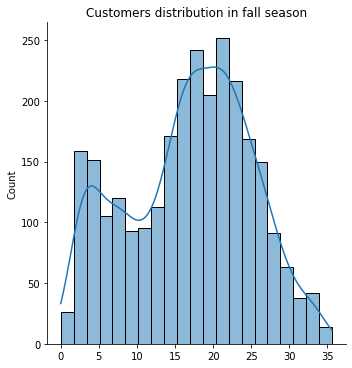

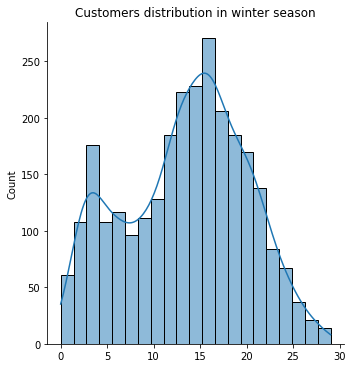

In [210]:
#Checking distribution after transformation.
sns.displot(spring_boxcox[0],kde=True)
plt.title('Customers distribution in spring season')
plt.show()

sns.displot(summer_boxcox[0],kde=True)
plt.title('Customers distribution in summer season')
plt.show()

sns.displot(fall_boxcox[0],kde=True)
plt.title('Customers distribution in fall season')
plt.show()

sns.displot(winter_boxcox[0],kde=True)
plt.title('Customers distribution in winter season')
plt.show()

In [211]:
print(f"The variance for spring after transformation is {spring_boxcox[0].var().round(2)}")
print(f"The variance for summber after transformation is {summer_boxcox[0].var().round(2)}")
print(f"The variance for fall after transformation is {fall_boxcox[0].var().round(2)}")
print(f"The variance for winter after transformation is {winter_boxcox[0].var().round(2)}")
# The variance is some what closer after the transformation.

The variance for spring after transformation is 16.25
The variance for summber after transformation is 44.68
The variance for fall after transformation is 66.09
The variance for winter after transformation is 42.42


In [212]:
t,p = stats.f_oneway(spring_boxcox[0],summer_boxcox[0],fall_boxcox[0],winter_boxcox[0])
print(f"The 'f' stats for different seasons is found to be {t.round(2)}, with the 'p-value' {p.round(5)} and hence we reject our null hypothesis and accept our alternative hypothesis i.e., number of cycles rented in different season is 'different'.")

The 'f' stats for different seasons is found to be 890.49, with the 'p-value' 0.0 and hence we reject our null hypothesis and accept our alternative hypothesis i.e., number of cycles rented in different season is 'different'.


### Chi-square Test:
#### To check weather is dependent on the season.

#### Setting null and alternative hypothesis.
* Null hypothesis 'H0' : Weather is dependent on season.
* Alternative 'H1' : Weather is independent of season.


In [213]:
# Dropping bad weather index as its frequence is just 1.
df[df['weather'] == 'Bad'].index[0]

5631

In [214]:
df.drop(df[df['weather'] == 'Bad'].index[0],inplace=True)

In [215]:
df[df['weather'] == "Bad"]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [216]:
# Contingency table for weather and season.
x = pd.crosstab(index=df['weather'],columns = df['season'],values=df['count'], aggfunc=np.sum)
x

season,fall,spring,summer,winter
weather,,,,
Good,470116,223009,426350,356588
cloudy/mist,139386,76406,134177,157191
slightly bad,31160,12919,27755,30255


In [217]:
t,p,dof,arr = stats.chi2_contingency(x)

In [253]:
print(f"The 'f' stats for different seasons is found to be {t.round(2)}, with the 'p-value' {p.round(5)} and hence we reject our null hypothesis and accept our alternative hypothesis i.e.,weather is independent of season'.")

The 'f' stats for different seasons is found to be 10838.37, with the 'p-value' 0.0 and hence we reject our null hypothesis and accept our alternative hypothesis i.e.,weather is independent of season'.


In [252]:
# Applying bootstrap to find mean and confidence intervals.
def bootstrap(data,nsample,size):
    xbar = list()
    for _ in range(nsample):
        sample = np.random.choice(data,size=size)
        xbar.append(sample.mean())
    return xbar

def ci_value(xbar,alpha):
    per1,per2 = np.percentile(xbar,[((1-alpha)/2)*100,(1-(1-alpha)/2)*100])
    return per1,per2

def bootplot(data,nsample,size,alpha,f_name):
    xbar = bootstrap(data,nsample,size)
    a,b = ci_value(xbar,alpha)
#     sns.histplot(xbar)
#     plt.axvline(a)
#     plt.axvline(b)
#     plt.show()
    print()
    print(f"The mean of customers in '{f_name}' is {np.array(xbar).mean().round(2)} customers per hour ({alpha*100}% Confidence interval range {a.round(2)} to {b.round(2)}).")
    print('-'*100)
    
bootplot(spring,1000,5000,0.95,'spring')
bootplot(summer,1000,5000,0.95,'summer')
bootplot(fall,1000,5000,0.95,'fall')
bootplot(winter,1000,5000,0.95,'winter')

bootplot(good,1000,5000,0.95,'good weather')
bootplot(cloudy,1000,5000,0.95,'cloudy weather')
bootplot(slightly_bad,1000,5000,0.95,'hazy weather')

working = df[df['workingday'] == "Working Day"]['count']
non_working = df[df['workingday'] != "Working Day"]['count']

bootplot(working,1000,5000,0.95,'working day')
bootplot(non_working,1000,5000,0.95,'non working day')

holiday = df[df['holiday'] == "Yes"]['count']
non_holiday = df[df['holiday'] == "No"]['count']

bootplot(holiday,1000,5000,0.95,'holidays')
bootplot(non_holiday,1000,5000,0.95,'non holdays')



The mean of customers in 'spring' is 116.37 customers per hour (95.0% Confidence interval range 112.93 to 119.76).
----------------------------------------------------------------------------------------------------

The mean of customers in 'summer' is 215.36 customers per hour (95.0% Confidence interval range 210.15 to 220.84).
----------------------------------------------------------------------------------------------------

The mean of customers in 'fall' is 234.32 customers per hour (95.0% Confidence interval range 228.99 to 239.91).
----------------------------------------------------------------------------------------------------

The mean of customers in 'winter' is 199.0 customers per hour (95.0% Confidence interval range 194.1 to 203.72).
----------------------------------------------------------------------------------------------------

The mean of customers in 'good weather' is 205.2 customers per hour (95.0% Confidence interval range 199.74 to 210.73).
---------------

#### EDA : only for means of different situtaion and their Confidence Intervals.
* The mean of customers in 'spring' is 116.3 customers per hour (95.0% Confidence interval range 108.85 to 124.08).
* The mean of customers in 'summer' is 215.07 customers per hour (95.0% Confidence interval range 202.91 to 227.71).
* The mean of customers in 'fall' is 234.3 customers per hour (95.0% Confidence interval range 222.84 to 245.34).
* The mean of customers in 'winter' is 198.86 customers per hour (95.0% Confidence interval range 187.18 to 209.13).
* The mean of customers in 'good weather' is 205.38 customers per hour (95.0% Confidence interval range 192.73 to 217.62).
* The mean of customers in 'cloudy weather' is 179.03 customers per hour (95.0% Confidence interval range 169.51 to 188.94).
* The mean of customers in 'hazy weather' is 118.92 customers per hour (95.0% Confidence interval range 110.82 to 127.66).
* The mean of customers in 'working day' is 188.58 customers per hour (95.0% Confidence interval range 177.89 to 200.16).
* The mean of customers in 'non working day' is 193.05 customers per hour (95.0% Confidence interval range 181.47 to 204.21).
* The mean of customers in 'holidays' is 191.74 customers per hour (95.0% Confidence interval range 180.63 to 203.3).
* The mean of customers in 'non-holidays' is 185.83 customers per hour (95.0% Confidence interval range 180.63 to 203.3).


# Recommendation:



* Mean of customers in spring and hazy weather is the lowest so attractive offers can be introduced in those periods.

* In summer, fall and Good weather the customer count for every hour on average is the highest so our route recommendation should work the optimized way possible in these cases.

* Many new customers are added in year 2012 so bikes renting capacity should also increase.

* Different weather has effect on number of cycles rented so to minimize this more attractive offers can introduced as weather changes.

* Working day or not the average users remains almost the same so no need to emphasize on working and non working days.



 